In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Carregando os dados
data = pd.read_csv('C:/Users/eleut/OneDrive/Documentos/GitHub/data-analytics-projects/unicorns till sep 2022.csv')

In [3]:
## Exibindo informações básicas sobre os dados
data.shape

(1186, 7)

In [4]:
data.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City ',
       'Industry', 'Investors'],
      dtype='object')

In [5]:
# Renomeando as colunas para facilitar a compreensão
data.rename(columns={
    'Company' : 'Empresa',
    'Date Joined' :  'Data de Adesão',
    'Country' : 'País',
    'City ' : 'Cidade',
    'Industry': 'Indústria',
    'Investors' : 'Investidores',
    
}, inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Empresa         1186 non-null   object
 1   Valuation ($B)  1186 non-null   object
 2   Data de Adesão  1186 non-null   object
 3   País            1186 non-null   object
 4   City            1186 non-null   object
 5   Indústria       1186 non-null   object
 6   Investidores    1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


In [7]:
data.isnull().sum()

Empresa            0
Valuation ($B)     0
Data de Adesão     0
País               0
City               0
Indústria          0
Investidores      18
dtype: int64

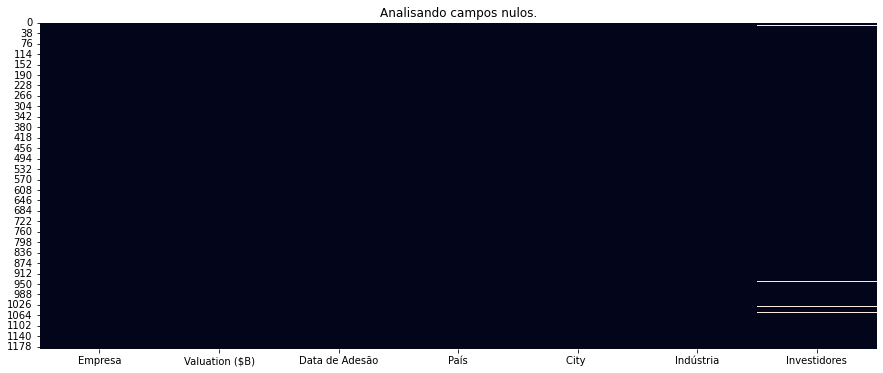

In [8]:
# Visualização dos dados faltantes com um mapa de calor
plt.figure(figsize=(15,6))
plt.title('Analisando campos nulos.')
sns.heatmap(data.isnull(), cbar=False);

In [9]:
# Explorando os setores onde operam as startups
data['Indústria'].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics',
       'Sequoia Capital, Thoma Bravo, Softbank', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Jungle Ventures, Accel, Venture Highway',
       'Artificial Intelligence', 'GIC. Apis Partners, Insight Partners',
       'Vision Plus Capital, GSR Ventures, ZhenFund',
       'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
       'Internet', '500 Global, Rakuten Ventures, Golden Gate Ventures',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Dragonfly Captial, Qiming Venture Pa

In [25]:
data['País'].sort(values)

AttributeError: 'Series' object has no attribute 'sort'

In [10]:
data['Indústria'].value_counts()

Fintech                                                               239
Internet software & services                                          224
E-commerce & direct-to-consumer                                       103
Health                                                                 94
Artificial intelligence                                                74
Supply chain, logistics, & delivery                                    65
Other                                                                  65
Cybersecurity                                                          58
Data management & analytics                                            45
Auto & transportation                                                  40
Hardware                                                               38
Mobile & telecommunications                                            37
Edtech                                                                 32
Consumer & retail                     

In [11]:
data['Indústria'].value_counts(normalize=True)

Fintech                                                               0.201518
Internet software & services                                          0.188870
E-commerce & direct-to-consumer                                       0.086847
Health                                                                0.079258
Artificial intelligence                                               0.062395
Supply chain, logistics, & delivery                                   0.054806
Other                                                                 0.054806
Cybersecurity                                                         0.048904
Data management & analytics                                           0.037943
Auto & transportation                                                 0.033727
Hardware                                                              0.032040
Mobile & telecommunications                                           0.031197
Edtech                                              

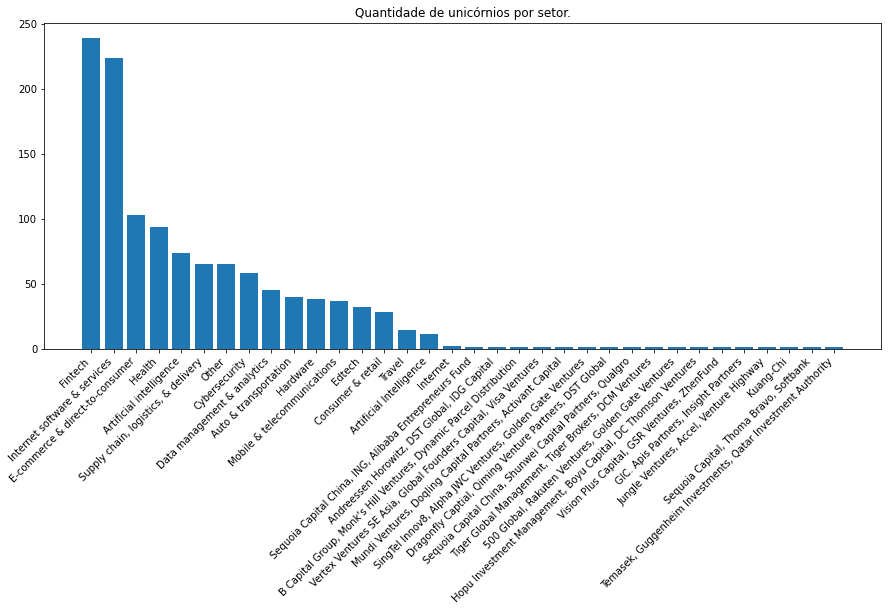

In [12]:
# Visualização de como as startups se distribuem pelos diferentes setores 
plt.figure(figsize=(15,6))
plt.title('Quantidade de unicórnios por setor.')
plt.bar(data['Indústria'].value_counts().index, data['Indústria'].value_counts())
plt.xticks(rotation=45, ha='right');

In [13]:
analizeData =  round(data['País'].value_counts(normalize=True)*100,1)

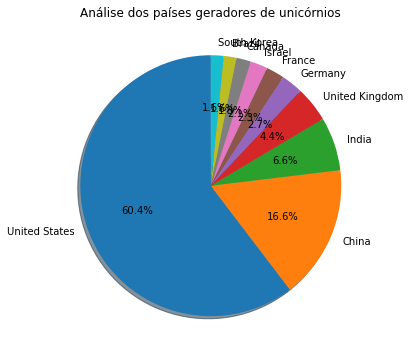

In [14]:
# Visualizando a distribuição dos países geradores de unicórnios em um gráfico de pizza
plt.figure(figsize=(15,6))
plt.title('Análise dos países geradores de unicórnios')
plt.pie(
    analizeData.head(10),
    labels = analizeData.index[0:10],
    shadow = True,
    startangle=90,
    autopct='%1.1f%%');

In [15]:
data['Data de Adesão'] = pd.to_datetime(data['Data de Adesão'])

In [16]:
# Criando novas colunas para mês e ano a partir da data de adesão
data['Mês'] = pd.DatetimeIndex(data['Data de Adesão']).month
data['Ano'] = pd.DatetimeIndex(data['Data de Adesão']).year

In [17]:
#Tabela analítica
cluster_analysis = data.groupby(by=['País', 'Mês', 'Ano']).count()['Empresa'].reset_index()

In [18]:
cluster_analysis.loc[
    cluster_analysis['País'] == 'Brazil'
]

,País,Mês,Ano,Empresa
14,Brazil,1,2020,1
15,Brazil,1,2021,1
16,Brazil,2,2022,1
17,Brazil,5,2022,1
18,Brazil,6,2019,1
19,Brazil,7,2018,1
20,Brazil,8,2021,2
21,Brazil,9,2019,1
22,Brazil,9,2021,1
23,Brazil,10,2019,1


In [19]:
# Convertendo a coluna 'Valuation ($B)' para numérica
data['Valuation ($B)'] = pd.to_numeric(data['Valuation ($B)'].apply(lambda linha: str(linha).replace('$', '') if isinstance(linha,str) else linha))

,Empresa,Valuation ($B),Data de Adesão,País,City,Indústria,Investidores,Mês,Ano
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [20]:
# Agrupando por país e calculando a soma do valuation ($B)
valuation_clustering = data.groupby(by=['País']).sum()['Valuation ($B)'].reset_index()
order_valuation_clustering = valuation_clustering.sort_values('Valuation ($B)',ascending=False)

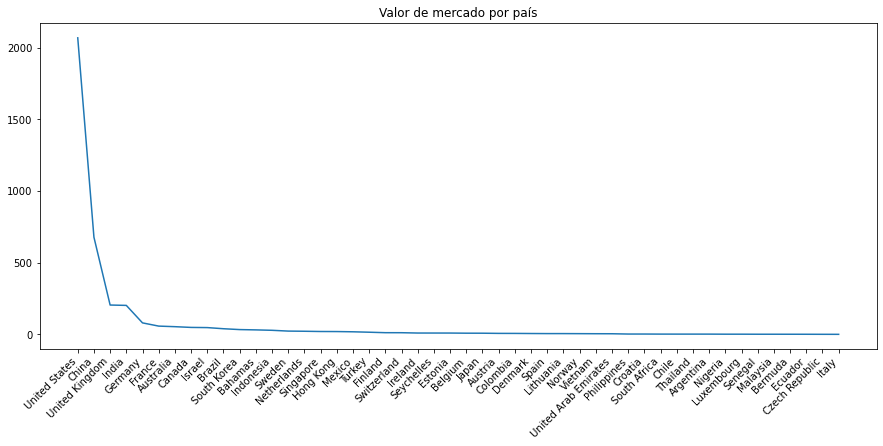

In [21]:
# Visualizando o valor de mercado por país em um gráfico de linha
plt.figure(figsize=(15,6))
plt.title('Valor de mercado por país')
plt.plot(order_valuation_clustering['País'], order_valuation_clustering['Valuation ($B)'])
plt.xticks(rotation=45, ha='right');

In [23]:
order_valuation_clustering.head(10)

,País,Valuation ($B)
46,United States,2069.89
9,China,678.59
45,United Kingdom,205.45
20,India,202.92
18,Germany,80.88
17,France,58.42
1,Australia,54.40
7,Canada,49.23
23,Israel,48.02
6,Brazil,40.08
